# Profound Data 

- data imported via: https://github.com/COST-FP1304-PROFOUND
- get structure via: https://cran.r-project.org/web/packages/ProfoundData/vignettes/PROFOUNDdatabase.html

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import e, log

for running PRELES the following Data is needed:
- PAR: daily sums of photosynthetically active radiation [mmol/m2]
          - CLIMATE: rad_Jcm2day (total daily global radiation)


- TAir: mean temperature daily [°C]
          - Climate_Local: tmean_degC [daily mean]

- VPD: mean vapour pressure deficits of the day
          - Meteorological: vpdF_hPa [half-hourly]
          
- Precip: precipitation above canopy
          - Meteorological: p_mm [haf hourly]
          - Climate: p_mm [total daily in mm]

- CO2: of air [ppm]
          - CO2_ISIMIP: co2_ppm

- fAPAR: fraction of absorbed photosynthetic radiation; estimatable from LAI {0,1}
          - MODIS: LAI, fpar
          - STAND: LAI
  estimatable via Beer-Lambert law
  
  $f_{aPAR}=1-e^{-kL}$ with $k$ extinction coefficient and $L$ leaf area index $\left[\frac{m^2}{m^2}\right]$
  

- DOY: Day of year

- GPP:
          - MODIS: gpp_gCm2d (1km & 8-day resolution)


In [6]:
#connect to database
con = sqlite3.connect('C:/Users/Niklas/Desktop/Uni/M.Sc. Environmental Science/Thesis/physics_guided_nn/data/ProfoundData.sqlite')

In [77]:
#select data needed
#df = pd.read_sql_query('SELECT * FROM CLIMATE_LOCAL', con)
#v = pd.read_sql_query('SELECT * FROM METEOROLOGICAL', con)
et = pd.read_sql_query('SELECT * FROM ATMOSPHERICHEATCONDUCTION', con)

In [102]:
%matplotlib qt
#v.loc[v['site_id']==14, ['timestampStart']]
#et.info()
#et['date']
hyt = et.loc[et['site_id']==3, ['date','leCORR_Wm2']]
print(hyt)
'''
hyyt = hyt.set_index(pd.to_datetime(hyt['date']))
hyytiala = hyyt.resample('D').mean()
hyytiala['ET'] = (hyytiala.leCORR_Wm2/2257)*0.001*86400
plt.plot(hyytiala.index, hyytiala.ET)
'''

                       date  leCORR_Wm2
333120  2000-01-01 00:00:00         NaN
333121  2000-01-01 00:30:00         NaN
333122  2000-01-01 01:00:00         NaN
333123  2000-01-01 01:30:00         NaN
333124  2000-01-01 02:00:00         NaN
...                     ...         ...
490938  2008-12-31 21:00:00         NaN
490939  2008-12-31 21:30:00         NaN
490940  2008-12-31 22:00:00         NaN
490941  2008-12-31 22:30:00         NaN
490942  2008-12-31 23:00:00         NaN

[157823 rows x 2 columns]


"\nhyyt = hyt.set_index(pd.to_datetime(hyt['date']))\nhyytiala = hyyt.resample('D').mean()\nhyytiala['ET'] = (hyytiala.leCORR_Wm2/2257)*0.001*86400\nplt.plot(hyytiala.index, hyytiala.ET)\n"

In [24]:
res = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

VERSION_master
SITESID_master
SITES_master
SITEDESCRIPTION_master
METADATA_SITEDESCRIPTION_master
SOIL_master
METADATA_SOIL_master
METADATA_SOIL_SITES_master
PLOTSIZE_master
METADATA_PLOTSIZE_master
METADATA_PLOTSIZE_SITES_master
TREESPECIES_master
TREE_master
METADATA_TREE_master
METADATA_TREE_SITES_master
METADATA_TREESPECIES_master
STAND_master
METADATA_STAND_master
METADATA_STAND_SITES_master
CLIMATEFLUXNET_master
METADATA_CLIMATEFLUXNET_master
METADATA_CLIMATEFLUXNET_SITES_master
CLIMATE_LOCAL_master
METADATA_CLIMATE_LOCAL_master
METADATA_CLIMATE_LOCAL_SITES_master
CO2_ISIMIP_master
METADATA_CO2_ISIMIP_master
NDEPOSITION_EMEP_master
METADATA_NDEPOSITION_EMEP_master
NDEPOSITION_ISIMIP2B_master
METADATA_NDEPOSITION_ISIMIP2B_master
MODIS_MOD09A1_master
MODIS_MOD11A2_master
MODIS_MOD13Q1_master
MODIS_MOD15A2_master
MODIS_MOD17A2_master
METADATA_MODIS_MOD09A1_master
METADATA_MODIS_MOD11A2_master
METADATA_MODIS_MOD13Q1_master
METADATA_MODIS_MOD15A2_master
METADATA_MODIS_MOD17A2_master
F

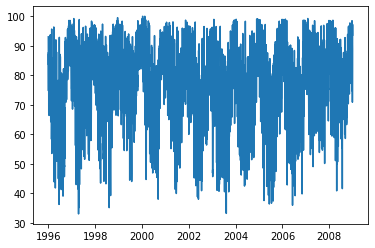

In [20]:
#type(df)
# select climate site hyytiala
#df.info()

plt.plot(pd.to_datetime(df.loc[df['site_id']==14, 'date']), df.loc[df['site_id']==14, 'relhum_percent'])
#plt.plot(df.loc[df['site_id']==3, 'rad_Jcm2day'])
#plt.plot(df.loc[df['site_id']==5, 'rad_Jcm2day'])
#plt.plot(df.loc[df['site_id']==14, 'rad_Jcm2day'])

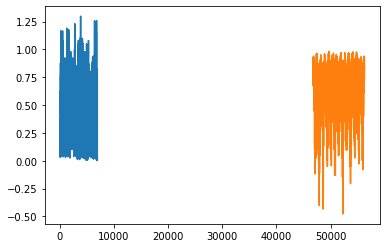

In [76]:
# calc vpd
d = df.loc[df['site_id']==14]
relhum = d['relhum_percent']
tmax = d['tmax_degC']
tmin = d['tmin_degC']
def es(t):
    return 0.6108*e**((17.27*t)/(t+237.3))
def ee(tmin, tmax, f):
    return (f(tmax)- f(tmin))/2

vpd = -(relhum/100)*ee(tmin, tmax, es) + 1

#testv = v.set_index(pd.to_datetime(v['date']))
#v = testv.resample('D').mean()

plt.plot(v['vpdFMDS_hPa'].values/10)
plt.plot(vpd)
#plt.plot(v['vpdFMDS_hPa'].values)



## choose sites
### condition: in same ecosystem, e.g. conifer

- F.5.2 -> species-rich, eutrophic and eu-mesotrophic beech and mixed beech forests
- F.5.1 -> species-poor, oligotrophic to mesotrophic beech and mixed beech

- D.1.3 -> southern boreal coniferous forests: spruce
- F.1 -> species-poor acidophilous, oligo- to mesotraphent oak and mixed oak frests

### same ecosystem:
##### mixed conifers & deciduous
- 3: fagus sylvatica (deciduous), Abies alba (conifer), Picea abies (conifer)
- 5: fagus sylvatica, Abies alba, Geranium nodosum(decid), Trochiscanthes nodiflora (decid)
- 12: Picea abies, dwarf shrubs and herbaceous plants

##### others
- 14: Quercus robur, Pinus pinaster (c)
- 21: Fagus sylvatica, Fraxinus excelsior (decidous only)





In [31]:
#print(df[df.loc[df['site']=='soro']['natVegetation_description']])
df

,site_id,site,lat,lon,epsg,country,aspect_deg,elevation_masl,slope_percent,natVegetation_code1,natVegetation_code2,natVegetation_description
0,3,bily_kriz,49.300000,18.320000,4326.0,Czech Republic,180.0,875.0,12.5,F.5.2.3,F134,Hercynian (spruce-)fir-beech forests (Fagus sy...
1,5,collelongo,41.849336,13.588217,4326.0,Italy,252.0,1560.0,10.0,F.5.2.3,F146,North and middle Apennine beach forests (Fagus...
2,12,hyytiala,61.847420,24.294770,4326.0,Finland,180.0,185.0,2.0,D.1.3,D7,Fennoscandianmoss-rich spruce forests (Picea a...
3,13,kroof,48.250000,11.400000,4326.0,Germany,1.8,502.0,2.1,F.5.1.2,F85,Central European Luzula luzuloides-(sessile oa...
4,14,le_bray,44.717110,-0.769300,4326.0,France,NaN,61.0,0.0,F.1.1,F7,Aquitanian pedunculate oak forests (Quercus ro...
5,16,peitz,51.916600,14.350000,4326.0,Germany,NaN,50.0,0.0,D.5.3.1,D54,SouthScandinavian-east Central European dwarf ...
6,20,solling_beech,51.770000,9.570000,4326.0,Germany,225.0,504.0,1.0,F.5.1.2,F83,(Atlantic-)subatlantic Luzula luzuloides-(sess...
7,21,soro,55.485844,11.644616,4326.0,Denmark,NaN,40.0,0.0,F.5.2.1,F108,South Scandinavian-north Central European Gali...
8,25,solling_spruce,51.764700,9.579700,4326.0,Germany,90.0,508.0,1.0,F.5.1.2,F83,(Atlantic-)subatlantic Luzula luzuloides-(sess...
9,99,global,0.000000,0.000000,NaN,World,NaN,508.0,NaN,none,none,none


 # Fix fAPAR

In [231]:
datafpar = pd.read_sql_query('SELECT * FROM MODIS', con)

In [232]:
data = datafpar.loc[datafpar['site_id'] == 12, ['date', 'fpar_percent']]
data = data.set_index(pd.to_datetime(data['date']))
data = data.drop(['date'], axis=1)
data['fapar'] = data['fpar_percent'].copy()
start = data.index[0]
end = data.index[-1]


In [233]:
data = data[data.index.isin(pd.date_range(start, end))]['fapar']
idx = data[np.isnan(data)].index

In [234]:
# mean bevor and after
for i in idx:
    after = data.shift(periods=-1)
    bevor = data.shift(periods=1)
    if np.isfinite(bevor[i]) and np.isfinite(after[i]):
        data[i] = np.nanmean([bevor[i], after[i]])
    elif np.isfinite(bevor[i]):
        data[i] = bevor[i]
    elif np.isfinite(after[i]):
        data[i] = after[i]
    print(data[i])

0.0
0.48
0.15000000000000002
0.05500000000000001
0.34
0.09000000000000001
0.12
0.01
0.14500000000000002
0.045
0.16999999999999998
0.005
0.215
0.049999999999999996
0.84
0.84
0.79
0.11
0.42


In [238]:
newdata = pd.DataFrame(data = {'date': pd.date_range(start, end)})
nd = newdata.set_index(pd.to_datetime(newdata['date'])).drop(['date'], axis=1)
fapar = nd.join(data)
fapar

,fapar
date,
2000-03-05,0.11
2000-03-06,NaN
2000-03-07,NaN
2000-03-08,NaN
2000-03-09,NaN
...,...
2014-12-15,NaN
2014-12-16,NaN
2014-12-17,NaN


In [239]:
# fill gaps
nans = np.where(np.isnan(fapar.fapar))[0]
for i in nans:
    fapar.iloc[i]['fapar'] = fapar.iloc[i-1]['fapar']
    
    


In [242]:
fapar['fapar']


date
2000-03-05    0.11
2000-03-06    0.11
2000-03-07    0.11
2000-03-08    0.11
2000-03-09    0.11
              ... 
2014-12-15    0.42
2014-12-16    0.42
2014-12-17    0.42
2014-12-18    0.42
2014-12-19    0.42
Name: fapar, Length: 5403, dtype: float64